## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Overview
*Load the dataset and view the first few rows*

In [3]:
df = pd.read_csv("job_market_dataset.csv")

In [4]:
df.head(10)

,Job_Title,Experience_Years,Education_Level,Salary,Job_Type,Location,Company_Size,Age,Industry,Remote_Work,Skills,Performance_Rating
0,Sales Executive,26,Master,92976.0,Full-time,Boston,Enterprise,31,Finance,No,Data Analysis,3
1,Teacher,25,High School,145391.0,Internship,Seattle,Small,37,Finance,No,Marketing,5
2,Nurse,13,PhD,141509.0,Contract,Chicago,Small,45,Retail,No,Java,5
3,Sales Executive,16,High School,105447.0,Contract,Boston,Enterprise,38,Education,Yes,Python,2
4,Accountant,17,High School,129522.0,Internship,San Francisco,Medium,40,Education,Yes,SQL,2
5,Nurse,28,Master,75965.0,Internship,Boston,Medium,28,Education,Yes,Python,5
6,Nurse,19,High School,101144.0,Contract,Austin,Large,19,Retail,No,Data Analysis,2
7,Sales Executive,26,PhD,137433.0,Contract,Seattle,Medium,37,Retail,Yes,Marketing,2
8,Data Scientist,17,Bachelor,115201.0,Contract,Seattle,Small,41,IT,Yes,C++,4
9,Accountant,3,Master,NaN,Part-time,Chicago,Enterprise,42,Finance,No,Excel,5


*Check dataset dimensions (rows and columns).*

In [5]:
df.shape

(5050, 12)

*Identify the type of data present in each column (numerical, categorical, or textual).*

In [6]:
df.dtypes

Job_Title              object
Experience_Years        int64
Education_Level        object
Salary                float64
Job_Type               object
Location               object
Company_Size           object
Age                     int64
Industry               object
Remote_Work            object
Skills                 object
Performance_Rating      int64
dtype: object

## Data Quality Check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job_Title           5050 non-null   object 
 1   Experience_Years    5050 non-null   int64  
 2   Education_Level     5050 non-null   object 
 3   Salary              4797 non-null   float64
 4   Job_Type            5050 non-null   object 
 5   Location            4798 non-null   object 
 6   Company_Size        5050 non-null   object 
 7   Age                 5050 non-null   int64  
 8   Industry            5050 non-null   object 
 9   Remote_Work         5050 non-null   object 
 10  Skills              4798 non-null   object 
 11  Performance_Rating  5050 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 473.6+ KB


*Detect missing values in the dataset*

In [8]:
df.count()

Job_Title             5050
Experience_Years      5050
Education_Level       5050
Salary                4797
Job_Type              5050
Location              4798
Company_Size          5050
Age                   5050
Industry              5050
Remote_Work           5050
Skills                4798
Performance_Rating    5050
dtype: int64

In [9]:
df.isnull().sum()

Job_Title               0
Experience_Years        0
Education_Level         0
Salary                253
Job_Type                0
Location              252
Company_Size            0
Age                     0
Industry                0
Remote_Work             0
Skills                252
Performance_Rating      0
dtype: int64

In [10]:
df.describe()

,Experience_Years,Salary,Age,Performance_Rating
count,5050.000000,4.797000e+03,5050.000000,5050.000000
mean,16.973861,8.565064e+04,41.339604,2.993267
std,9.918948,6.675948e+04,13.603462,1.403090
min,0.000000,1.000000e+00,10.000000,1.000000
25%,9.000000,4.995400e+04,30.000000,2.000000
50%,17.000000,8.403700e+04,41.000000,3.000000
75%,25.000000,1.169170e+05,53.000000,4.000000
max,34.000000,3.000000e+06,120.000000,5.000000


*Identify duplicate rows.*

In [11]:
df.duplicated().sum()

np.int64(50)

In [12]:
df[df.duplicated(keep = False)]

,Job_Title,Experience_Years,Education_Level,Salary,Job_Type,Location,Company_Size,Age,Industry,Remote_Work,Skills,Performance_Rating
19,Teacher,16,Master,50924.0,Full-time,New York,Large,47,Education,Yes,SQL,1
228,Sales Executive,1,Master,143240.0,Full-time,Seattle,Medium,40,IT,No,C++,4
309,Software Engineer,29,Master,125939.0,Contract,NaN,Large,61,Education,Yes,SQL,1
313,Accountant,12,High School,88578.0,Contract,Boston,Large,61,Manufacturing,Yes,Data Analysis,3
412,Marketing Manager,18,High School,31167.0,Full-time,Boston,Enterprise,29,Education,No,SQL,4
...,...,...,...,...,...,...,...,...,...,...,...,...
5045,Nurse,32,Bachelor,124663.0,Internship,Boston,Medium,25,Retail,Yes,Python,5
5046,Software Engineer,21,PhD,108768.0,Contract,Boston,Small,22,Manufacturing,Yes,Java,4
5047,Nurse,18,Master,99183.0,Part-time,Remote,Enterprise,46,Education,No,Python,5
5048,Data Scientist,4,Master,NaN,Internship,Austin,Small,21,Manufacturing,Yes,Excel,2


*Check for inconsistent or incorrect entries.*

In [13]:
for column in df.columns:
    if df[column].dtype != "object":
        if (df[column] < 0).any():
            print(df[df[column]<0], [column].value_counts())
        else:
            print("All values are positive in", column)
        

All values are positive in Experience_Years
All values are positive in Salary
All values are positive in Age
All values are positive in Performance_Rating


In [14]:
print(df[df["Age"] > 120 ], df[df["Age"] < 0 ]) 

Empty DataFrame
Columns: [Job_Title, Experience_Years, Education_Level, Salary, Job_Type, Location, Company_Size, Age, Industry, Remote_Work, Skills, Performance_Rating]
Index: [] Empty DataFrame
Columns: [Job_Title, Experience_Years, Education_Level, Salary, Job_Type, Location, Company_Size, Age, Industry, Remote_Work, Skills, Performance_Rating]
Index: []


In [15]:
print(df[df["Performance_Rating"] > 5], df[df["Performance_Rating"] < 0])

Empty DataFrame
Columns: [Job_Title, Experience_Years, Education_Level, Salary, Job_Type, Location, Company_Size, Age, Industry, Remote_Work, Skills, Performance_Rating]
Index: [] Empty DataFrame
Columns: [Job_Title, Experience_Years, Education_Level, Salary, Job_Type, Location, Company_Size, Age, Industry, Remote_Work, Skills, Performance_Rating]
Index: []


In [16]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column, "\n", df[column].unique() )

Job_Title 
 ['Sales Executive' 'Teacher' 'Nurse' 'Accountant' 'Data Scientist'
 'Marketing Manager' 'Software Engineer']
Education_Level 
 ['Master' 'High School' 'PhD' 'Bachelor']
Job_Type 
 ['Full-time' 'Internship' 'Contract' 'Part-time']
Location 
 ['Boston' 'Seattle' 'Chicago' 'San Francisco' 'Austin' 'Remote' 'New York'
 nan]
Company_Size 
 ['Enterprise' 'Small' 'Medium' 'Large']
Industry 
 ['Finance' 'Retail' 'Education' 'IT' 'Healthcare' 'Manufacturing']
Remote_Work 
 ['No' 'Yes']
Skills 
 ['Data Analysis' 'Marketing' 'Java' 'Python' 'SQL' 'C++' 'Excel' nan]


## Column-Level Analysis

*Count the number of unique values in categorical columns*

In [17]:
with open("unique_values.txt", "w" ) as f:
    for column in df.columns:
        if df[column].dtype == 'object':
            output = df[column].value_counts().to_string()
            f.write(output)
            f.write("\n\n")

*Review data ranges for numerical columns.*

In [18]:
for column in df.columns:
    if df[column].dtype != "object":
        print(column,"range:" , df[column].min(),"-", df[column].max())

Experience_Years range: 0 - 34
Salary range: 1.0 - 3000000.0
Age range: 10 - 120
Performance_Rating range: 1 - 5


*how can a person have these salary and can live in nyc*

In [19]:
df[df["Salary"] < 20000]

,Job_Title,Experience_Years,Education_Level,Salary,Job_Type,Location,Company_Size,Age,Industry,Remote_Work,Skills,Performance_Rating
1346,Software Engineer,1,PhD,50.0,Part-time,Boston,Enterprise,38,Education,No,Python,5
1495,Sales Executive,24,Bachelor,10.0,Part-time,New York,Medium,49,Retail,No,Data Analysis,5
2203,Teacher,25,Master,5.0,Full-time,Chicago,Medium,50,Manufacturing,No,Python,1
2289,Teacher,2,PhD,1.0,Contract,Remote,Enterprise,35,Healthcare,Yes,Data Analysis,4


# **Here exp years is more than the age, fix the age amd experience data**

In [20]:
df[df["Age"] < 18]

,Job_Title,Experience_Years,Education_Level,Salary,Job_Type,Location,Company_Size,Age,Industry,Remote_Work,Skills,Performance_Rating
3319,Accountant,8,High School,144145.0,Contract,Austin,Large,10,Manufacturing,No,C++,4
4542,Data Scientist,17,High School,41236.0,Full-time,Chicago,Enterprise,15,Finance,No,Marketing,1


In [21]:
df[df["Salary"] > 150000]

,Job_Title,Experience_Years,Education_Level,Salary,Job_Type,Location,Company_Size,Age,Industry,Remote_Work,Skills,Performance_Rating
633,Sales Executive,27,High School,3000000.0,Internship,Remote,Medium,49,Manufacturing,Yes,Excel,3
868,Software Engineer,22,PhD,2000000.0,Full-time,Austin,Small,49,Finance,No,C++,1
2565,Sales Executive,13,PhD,1000000.0,Contract,Seattle,Enterprise,64,Manufacturing,Yes,Java,4
3684,Nurse,33,PhD,750000.0,Part-time,Seattle,Large,44,IT,Yes,C++,4
3739,Sales Executive,32,PhD,999999.0,Contract,Austin,Medium,54,Finance,Yes,SQL,3
4452,Software Engineer,34,High School,500000.0,Contract,San Francisco,Enterprise,28,Finance,Yes,Marketing,3


## **Cleaning the data**

In [22]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

## *Visualizing the data* 

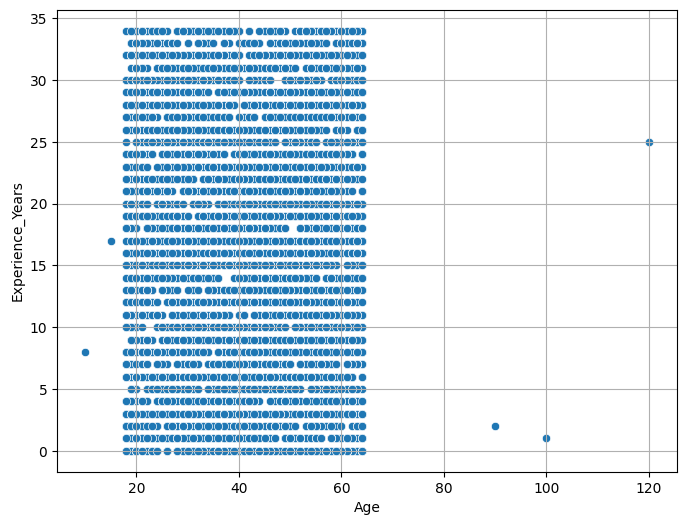

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df , x ="Age" , y = "Experience_Years")
plt.grid(True)
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

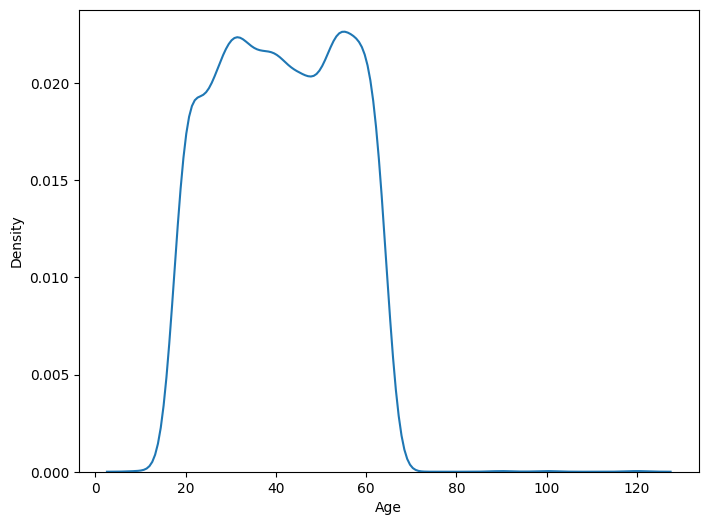

In [29]:
plt.figure(figsize=(8,6))
sns.kdeplot(df["Age"] )

<Axes: xlabel='Age', ylabel='Count'>

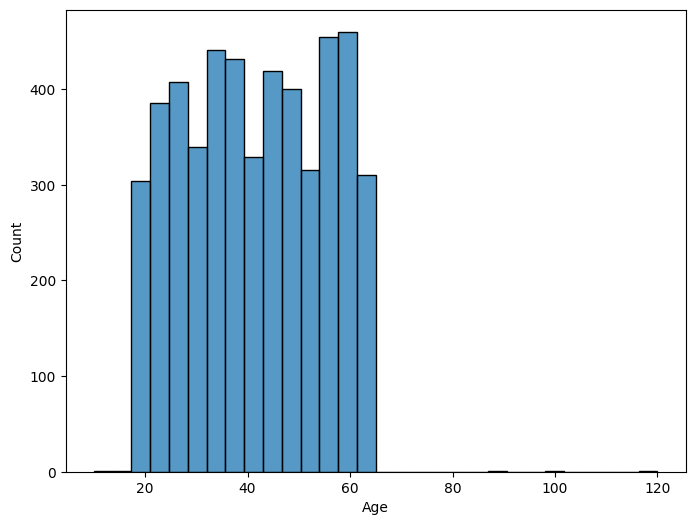

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(df["Age"], bins = 30)

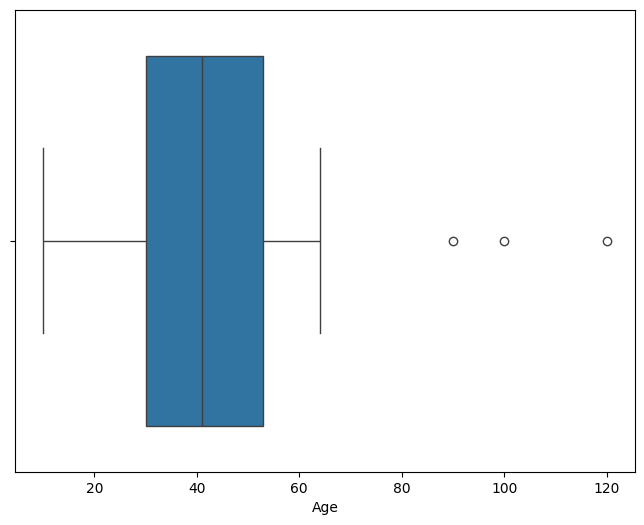

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df["Age"])
plt.show()

<Axes: xlabel='Experience_Years', ylabel='Density'>

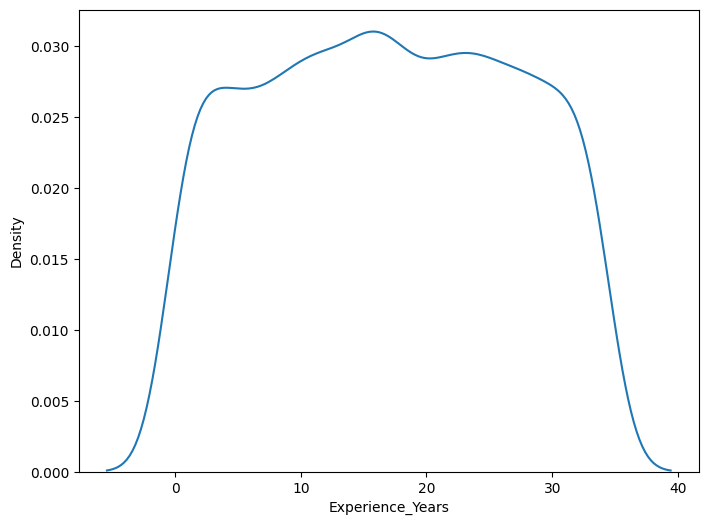

In [27]:
plt.figure(figsize = (8,6))
sns.kdeplot(data =df, x = "Experience_Years")

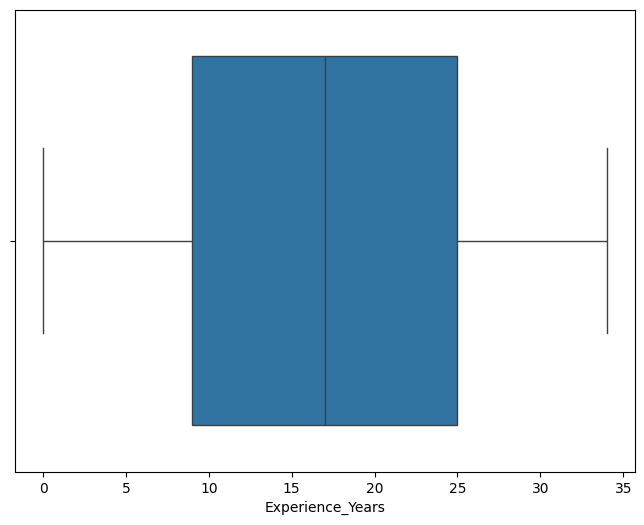

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df["Experience_Years"])
plt.show()

<Axes: xlabel='Salary', ylabel='Density'>

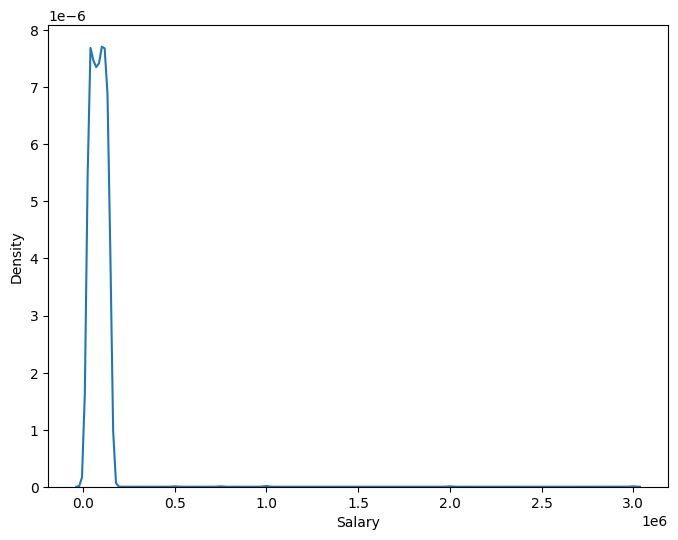

In [28]:
plt.figure(figsize=(8,6))
sns.kdeplot(x = df["Salary"])

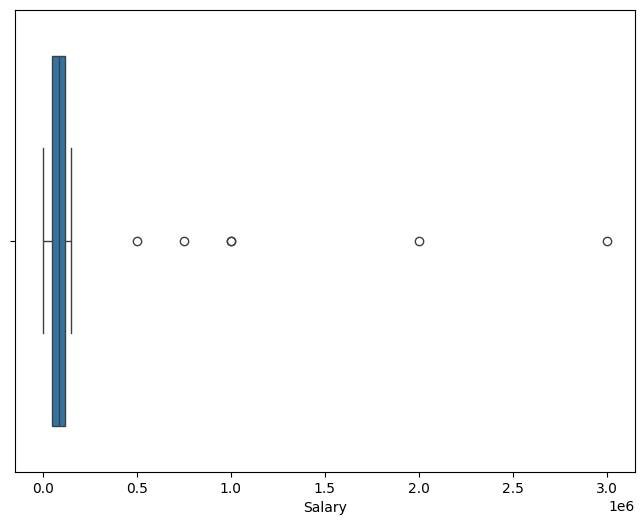

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df["Salary"])
plt.show()

<Axes: xlabel='Experience_Years', ylabel='Salary'>

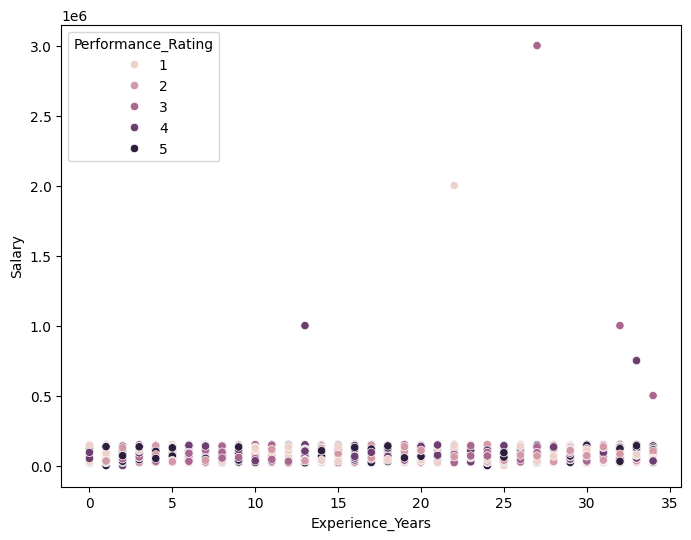

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = "Experience_Years", y = "Salary", hue = "Performance_Rating")

## *Insights*
# *salary vs exp year does not have relation*
# *Age vs performance as age inc so ratings*
# *exp, salary has no relation with ratings*


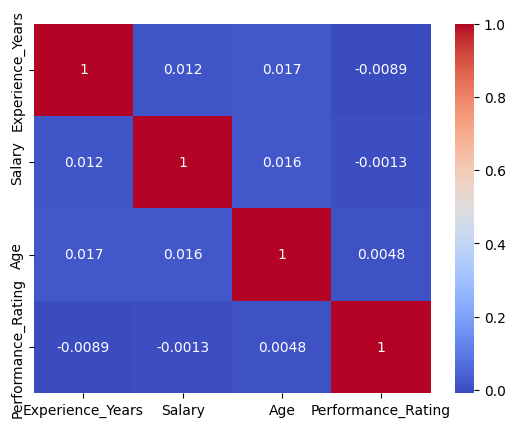

In [ ]:
corr = df.select_dtypes(include=[int, float]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()